### Import the dependencies

In [1]:
import pandas as pd

### Data Collection and pre-processing

In [2]:
# load the data from csv
titanic_data = pd.read_csv('data/titanic-train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
# getting some info about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Now drop the column Cabin as it's has majority of it's data as null
titanic_data = titanic_data.drop(columns="Cabin",axis=1)

In [8]:
# replace the null fields in Age with themeans
titanic_data.fillna({"Age": titanic_data["Age"].mean()}, inplace=True)

In [9]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

#### Now in this Embarked colum we have some string datatype for which we can not calculate the mean
#### That's wey we will find the which value is occured mostly (mode value)

In [10]:
print(titanic_data["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [11]:
print(titanic_data["Embarked"].mode()[0])

S


In [12]:
# replacing the missing values in "Embarked" column with mode value

In [13]:
titanic_data.fillna({"Embarked":titanic_data["Embarked"].mode()[0]}, inplace=True)

In [14]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Upto Now we have completed Data collection and Data Processing Now we will start data analysis

In [15]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
titanic_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Data Visualisation

In [17]:
import seaborn as sns

In [18]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

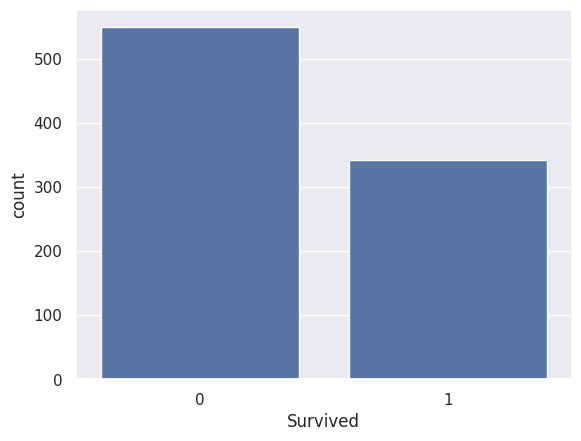

In [19]:
# making a count plot for the "Survived" Column
sns.countplot(x="Survived", data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

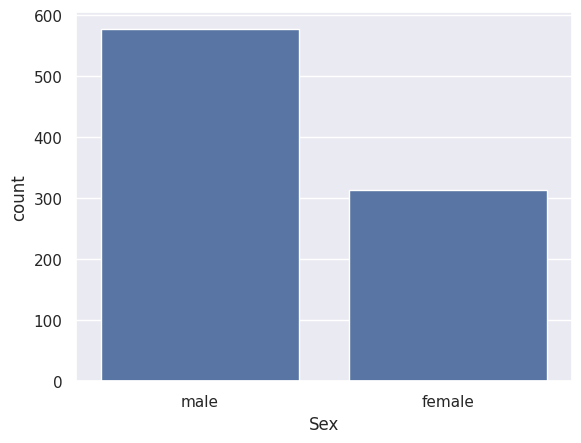

In [20]:
# making a count plot for the "Sex" Column
sns.countplot(x="Sex", data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

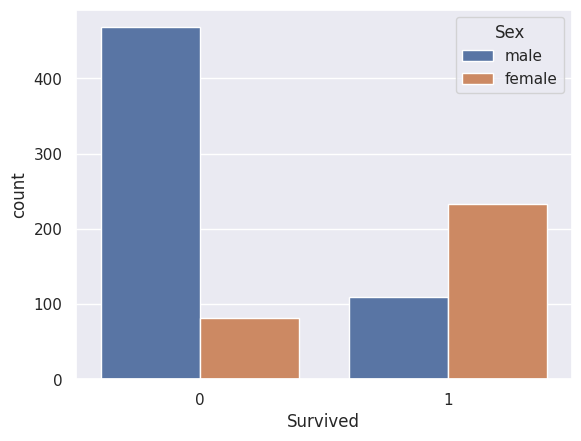

In [21]:
# Number of Survived Genderwise
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

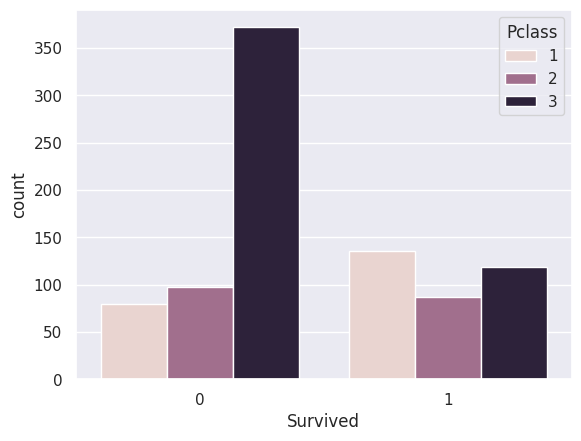

In [22]:
# Number of Survived based on Pclass
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

### Processing the data

In [23]:
# converting data to have numerical value for sex and embark columns
titanic_data["Sex"] = titanic_data["Sex"].replace({"male":0, "female":1}).astype(int)
titanic_data["Embarked"] = titanic_data["Embarked"].replace({"S":0, "C":1, "Q":2}).astype(int)

/tmp/ipykernel_9413/1927156696.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data["Sex"] = titanic_data["Sex"].replace({"male":0, "female":1}).astype(int)
/tmp/ipykernel_9413/1927156696.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data["Embarked"] = titanic_data["Embarked"].replace({"S":0, "C":1, "Q":2}).astype(int)


In [24]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


### Separating features and target

In [25]:
X = titanic_data.drop(columns=["PassengerId","Name","Ticket","Survived"],axis=1) 
# because name,ticket and pId will have help in determing and separating the target Survived from the dataset
Y = titanic_data["Survived"]

In [26]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [27]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


### Splitting the into tranning and test

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


### Train our logistic regration model

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

/home/subhajit/Desktop/learnings/ai_ml_learnings/zero-to-mastery-ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation
### Accuracy score
### Accuracy score on tranning data

In [31]:
X_train_prediction = model.predict(X_train)

from sklearn.metrics import accuracy_score

tranning_data_accuracy = accuracy_score(X_train_prediction,Y_train)

print("Accuracy on tranning data ", tranning_data_accuracy * 100)

Accuracy on tranning data  80.0561797752809


### Accuracy on test data

In [32]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

print("Accuracy on test data ", test_data_accuracy * 100)

Accuracy on test data  79.3296089385475


# If the duffrence between Accuracy of tranning and test data is huge the our model is overfitted

## Building the predictive system

In [33]:
import numpy as np
input_data = (3,0,35.0,0,0,7.8958,1)
input_data_as_numpy_array = np.asarray(input_data)
#### Reshape the numpy array as we are predicting for only one instance but the model expects a 2D array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# print(input_data_reshaped)
result = model.predict(input_data_reshaped)

if result[0] == 0:
    print("Not Survived")
else:
    print("Survived")

Not Survived


/home/subhajit/Desktop/learnings/ai_ml_learnings/zero-to-mastery-ml/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
